<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto Final**

Jairo Salazar

Carnet : 21000887 

***Parte I - Analisis exploratorio de Datos***


 

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb



In [118]:
#carga de dataset y slicin de los datos
def slicingDataset (ds,inicio,porcentaje):
  cantidad = int(np.round(ds.shape[0] * porcentaje,0))
  return ds[inicio:inicio+cantidad,0:6]
  


Dataset = np.load('proyecto_training_data.npy')
print (Dataset.shape)
dsEntrenamiento = slicingDataset(Dataset,0,0.80)
dsTest = slicingDataset(Dataset,int(dsEntrenamiento.shape[0])-1,0.20)
print (dsTest.shape)
print (dsEntrenamiento.shape)


(1460, 6)
(292, 6)
(1168, 6)


(1168, 6)
-------------------------------
       Precio de Venta
Media:  180590.27739726027
Valor Maximo:  755000.0
Valor Minimo:  34900.0
Rango:  720100.0
Desviacion Standard:  78781.95108033362
(1168,)
-------------------------------
       Overall Quality
Media:  6.101027397260274
Valor Maximo:  10.0
Valor Minimo:  1.0
Rango:  9.0
Desviacion Standard:  1.377435193240741
(1168,)
-------------------------------
       1st Floor SFT
Media:  1156.3236301369864
Valor Maximo:  3228.0
Valor Minimo:  334.0
Rango:  2894.0
Desviacion Standard:  373.620331503586
(1168,)
-------------------------------
       Total Rooms above grade
Media:  6.4854452054794525
Valor Maximo:  14.0
Valor Minimo:  2.0
Rango:  12.0
Desviacion Standard:  1.6084517167387253
(1168,)
-------------------------------
       Years Built
Media:  1971.451198630137
Valor Maximo:  2010.0
Valor Minimo:  1875.0
Rango:  135.0
Desviacion Standard:  29.93888206867768
(1168,)
-------------------------------
       Lot Frontage
Media

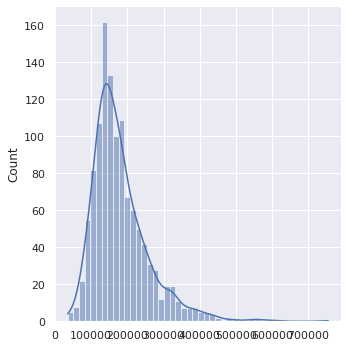

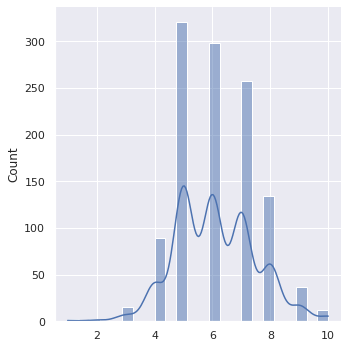

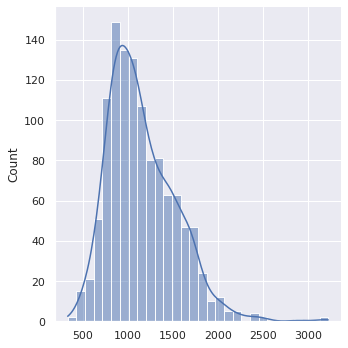

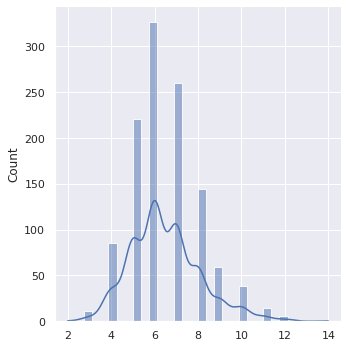

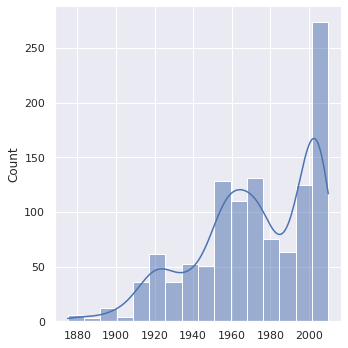

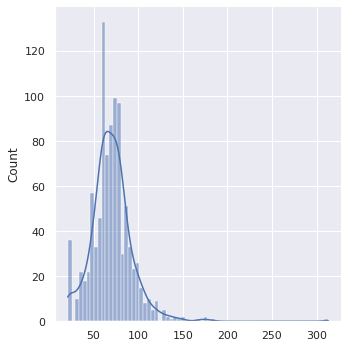

In [117]:
#Analisis Exploratorio de los datasets
#calculando media, valor maximo, valor minimo, rango, desviacion estandard.
def dimensiones (ds,columna,nombre):
  dimension = ds[0:ds.shape[0],columna-1:columna]
  dimension = dimension[np.logical_not(np.isnan(dimension))]
  media = np.mean(dimension)
  valmax = np.max(dimension)
  valmin = np.min(dimension)
  desvstd  = np.std(dimension)
  rango    = np.ptp(dimension)
  print('-------------------------------')
  print('      ', nombre)
  print ('Media: ',media)
  print ('Valor Maximo: ',valmax)
  print ('Valor Minimo: ',valmin)
  print ('Rango: ',rango)
  print ('Desviacion Standard: ',desvstd)
  sb.set_theme()
  print(dimension.shape)
  sb.displot(dimension,kde=True)


print(dsEntrenamiento.shape)
dimensiones(dsEntrenamiento,1,"Precio de Venta")
dimensiones(dsEntrenamiento,2,"Overall Quality")
dimensiones(dsEntrenamiento,3,"1st Floor SFT")
dimensiones(dsEntrenamiento,4,"Total Rooms above grade")
dimensiones(dsEntrenamiento,5,"Years Built")
dimensiones(dsEntrenamiento,6,"Lot Frontage")